# GPS Tracking location at constant speed with Kalman filtering

We need to synthetically generate noisy measurements of constant velocity in the two directions. In Python, this can be done in the following manner. You will need to have the numpy library for Python installed.

In [5]:
import numpy as np

In [6]:
# Number of Measurements
m = 100

# x velocity (constant)
vx= 10

# y velocity (constant)
vy= 10

# add random noise to each constant velocity measurement
mx = np.array(vx + np.random.randn(m)) 
my = np.array(vy + np.random.randn(m)) 
measurements = np.vstack((mx,my))

# Visualizing Data

In order to visualize the data generated, we will need the matplotlib library in Python.

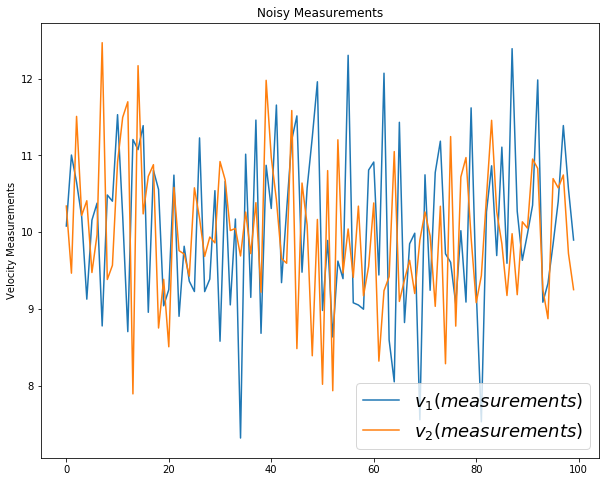

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
plt.plot(range(m),mx, label='$v_1 (measurements)$') 
plt.plot(range(m),my, label='$v_2 (measurements)$') 
plt.ylabel('Velocity Measurements')
plt.title('Noisy Measurements') 
plt.legend(loc='best',prop={'size':18})

# Initializing Variables
We can initialize the other variables and matrices discussed in the model in the following manner. Note that we will continue to need numpy for these.

In [15]:
# Time Step between Filter Steps
dt = 0.1

# Identity matrix
I = np.eye(4)

# state matrix
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T

# P matrix
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])

# A matrix 
A = np.matrix([[1.0, 0.0, dt, 0.0], [0.0, 1.0, 0.0, dt], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])

# H matrix
H = np.matrix([[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])

# R matrix
r = 100.0
R = np.matrix([[r, 0.0], [0.0, r]])

# Q, G matrices
s = 8.8
G = np.matrix([[0.5*dt**2], [0.5*dt**2], [dt], [dt]])
Q = G*G.T*s**2


# Kalman Filtering Algorithm
We can now run the Kalman Filtering algorithm with the following lines of code in Python.

In [19]:
# The Following variables will store the results, at each iteration
xt = [] 
yt = [] 
dxt= [] 
dyt= [] 
Zx = [] 
Zy = [] 
Px = [] 
Py = [] 
Pdx= [] 
Pdy= [] 
Rdx= [] 
Rdy= [] 
Kx = [] 
Ky = [] 
Kdx= [] 
Kdy= []

################################################### # Kalman Filtering Algorithm
for n in range(len(measurements[0])):
    # Prediction
    # state prediction
    x = A*x

    # error covariance prediction
    P = A*P*A.T + Q

    # Update Steps
    # Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

    # Update the estimate via z
    Z = measurements[:,n].reshape(2,1) 
    y = Z - (H*x)
    x = x + (K*y)

    # error covariance
    P = (I - (K*H))*P

    # Storing results
    xt.append(float(x[0])) 
    yt.append(float(x[1])) 
    dxt.append(float(x[2])) 
    dyt.append(float(x[3])) 
    Zx.append(float(Z[0])) 
    Zy.append(float(Z[1])) 
    Px.append(float(P[0,0])) 
    Py.append(float(P[1,1])) 
    Pdx.append(float(P[2,2])) 
    Pdy.append(float(P[3,3])) 
    Rdx.append(float(R[0,0])) 
    Rdy.append(float(R[1,1])) 
    Kx.append(float(K[0,0])) 
    Ky.append(float(K[1,0])) 
    Kdx.append(float(K[2,0])) 
    Kdy.append(float(K[3,0]))


# Visualizing Results
We can now visualize the results using the following lines of code in Python.

(0, 20)

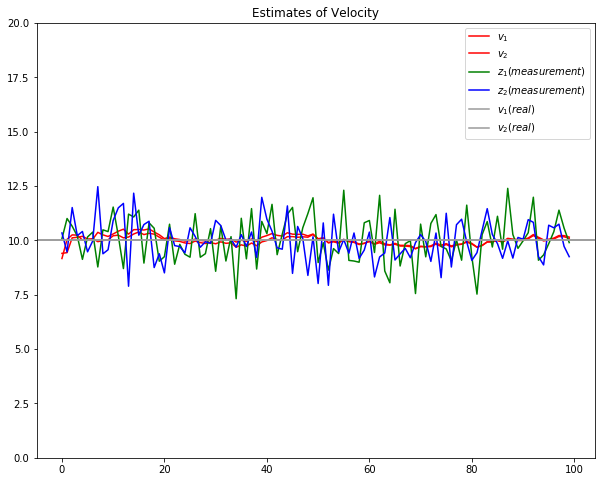

In [22]:
# Velocity Measurements
# Our estimates are in Red 
plt.figure(figsize=(10, 8))
plt.plot(range(len(measurements[0])),dxt, label='$v_1$', c='r') 
plt.plot(range(len(measurements[0])),dyt, label='$v_2$', c='r')

# The noisy velocity measurements in both directions are in green and blue.
plt.plot(range(len(measurements[0])),mx, label='$z_1 (measurement)$', c='g') 
plt.plot(range(len(measurements[0])),my, label='$z_2 (measurement)$', c='b')

# The actual constant velocity for both directions are in black
plt.axhline(vx, color='#999999', label='$v_1(real)$') 
plt.axhline(vy, color='#999999', label='$v_2(real)$')
plt.title('Estimates of Velocity') 
plt.legend(loc='best') 
plt.ylim([0, 20])


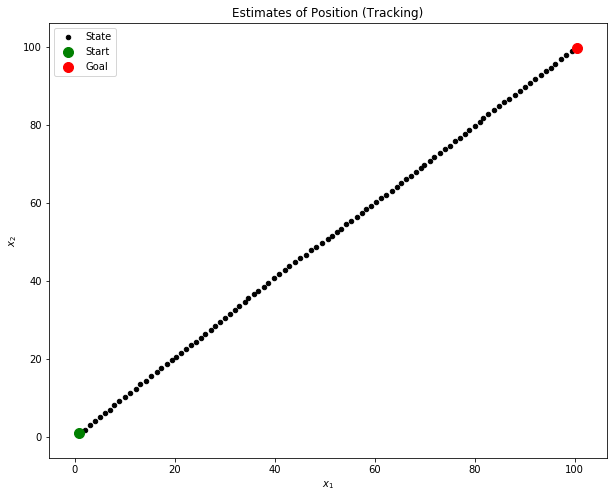

In [24]:
# Position Tracking
# Scatter plot of x and y location estimates in black 
# these should ideally form a straight line 
plt.figure(figsize=(10, 8))
plt.scatter(xt,yt, s=20, label='State', c='k')

# starting point in green and end point in red
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g') 
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Estimates of Position (Tracking)') 
plt.legend(loc='best')